In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# Read the XLSX file into a Pandas DataFrame
Air = pd.read_excel('USAcleaneddata_Updated.xlsx')

In [3]:
Air.drop(['Host Since'],axis=1,inplace=True)
Air.drop(['Host ID'],axis=1,inplace=True)
Air.drop(['First Review'],axis=1,inplace=True)
Air.drop(['Last Review'],axis=1,inplace=True)

In [4]:
Air.drop(['Experiences Offered'],axis=1,inplace=True)
Air.drop(['Street'],axis=1,inplace=True)
Air.drop(['Neighbourhood'],axis=1,inplace=True)
Air.drop(['Neighbourhood Cleansed'],axis=1,inplace=True)
Air.drop(['City'],axis=1,inplace=True)
Air.drop(['Country'],axis=1,inplace=True)
Air.drop(['Carbon monoxide detector'],axis=1,inplace=True)
Air.drop(['Elevator in building'],axis=1,inplace=True)
Air.drop(['Host Profile Pic'],axis=1,inplace=True)
Air.drop(['Instant Bookable'],axis=1,inplace=True)
Air.drop(['Require Guest Profile Picture'],axis=1,inplace=True)
Air.drop(['Require Guest Phone Verification'],axis=1,inplace=True)
Air.drop(['Requires License'],axis=1,inplace=True)

In [5]:
#split the dependent variable and independent variable
air_X =  Air.copy()
air_X.drop(['Price'],axis=1,inplace=True)
air_y = Air['Price']

In [6]:
air_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132582 entries, 0 to 132581
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Host Response Time              132582 non-null  object 
 1   Host Response Rate              132582 non-null  int64  
 2   Host Acceptance Rate            132582 non-null  float64
 3   Host Total Listings Count       132582 non-null  int64  
 4   State                           132582 non-null  object 
 5   Zipcode                         132582 non-null  object 
 6   Latitude                        132582 non-null  float64
 7   Longitude                       132582 non-null  float64
 8   Property Type                   132582 non-null  object 
 9   Room Type                       132582 non-null  object 
 10  Accommodates                    132582 non-null  int64  
 11  Bathrooms                       132582 non-null  float64
 12  Bedrooms        

In [7]:
#list all the categorical variables
columns_ohe =[0, 4, 5, 8, 9, 14, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]

In [8]:
selected_columns = air_X.iloc[:, [0, 4, 5, 8, 9, 14, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]]

In [9]:
selected_columns

,Host Response Time,State,Zipcode,Property Type,Room Type,Bed Type,License,Cancellation Policy,TV,Internet,...,Pets live on property,Pets allowed,Bathroom Amenities,24 Hour Check-in,Smoke detector,Breakfast,Air conditioning,Host Is Superhost,Host Identity Verified,Is Location Exact
0,1 Hour,TX,78704,Apartment,Entire home/apt,Real Bed,no license,flexible,yes,Yes,...,yes,yes,yes,yes,yes,no,yes,no,yes,yes
1,1 Hour,TX,78704,House,Entire home/apt,Real Bed,no license,moderate,no,Yes,...,no,no,yes,yes,yes,no,yes,no,no,yes
2,1 Hour,TX,78721,Condominium,Private room,Real Bed,no license,flexible,yes,Yes,...,no,no,yes,yes,no,no,yes,no,no,no
3,1 Hour,TX,78704,Apartment,Entire home/apt,Real Bed,no license,flexible,yes,Yes,...,no,no,yes,no,yes,no,yes,no,no,yes
4,1 Hour,TX,78704,House,Entire home/apt,Real Bed,no license,strict,yes,Yes,...,no,no,yes,yes,yes,no,yes,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132577,1 Hour,TX,78735,Apartment,Entire home/apt,Real Bed,no license,flexible,yes,Yes,...,no,no,yes,yes,yes,no,yes,no,yes,yes
132578,1 Hour,TX,78735,House,Private room,Real Bed,no license,flexible,yes,Yes,...,no,no,yes,no,yes,yes,yes,no,no,yes
132579,1 Hour,TX,78721,House,Private room,Real Bed,no license,flexible,yes,Yes,...,no,no,yes,no,yes,no,yes,no,yes,yes
132580,1 Hour,TX,78721,House,Entire home/apt,Real Bed,no license,moderate,yes,Yes,...,no,yes,yes,no,yes,no,yes,no,yes,yes


In [10]:
dummy = None  # Initialize dummy variable
for num in tqdm(columns_ohe):
    dummy_ = pd.get_dummies(air_X.iloc[:, num], sparse=True)
    if dummy is not None:
        dummy = pd.concat([dummy, dummy_], axis=1)
    else:
        dummy = dummy_


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:03<00:00,  6.52it/s]


In [11]:
dupe = air_X.drop(air_X.columns[columns_ohe], axis=1)

In [12]:
dupe = np.concatenate((dupe,dummy),axis=1)

In [13]:
list(dupe[1,:])

[100,
 88.0,
 1,
 30.24731296098833,
 -97.74221663315112,
 4,
 1.0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1125,
 False,
 7,
 7,
 7,
 7,
 0,
 93,
 10,
 9,
 10,
 10,
 9,
 9,
 1,
 1.486740022653255,
 96,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

In [14]:
air_X = air_X.drop(air_X.columns[columns_ohe], axis=1)

In [15]:
air_X = pd.concat([air_X, dummy], axis=1)

In [16]:
row_values = air_X.iloc[1, :]
row_values

Host Response Rate           100.000000
Host Acceptance Rate          88.000000
Host Total Listings Count      1.000000
Latitude                      30.247313
Longitude                    -97.742217
                                ...    
yes                            0.000000
no                             1.000000
yes                            0.000000
no                             0.000000
yes                            1.000000
Name: 1, Length: 1129, dtype: Sparse[float64, False]

In [17]:
np.random.seed(0)
number_of_samples = len(air_X)
random_indices = np.random.permutation(number_of_samples)

num_training_samples = int(number_of_samples * 0.75)

# Splitting both air_X and air_Y using the same shuffled indices for rows
air_X_train = air_X.iloc[random_indices[:num_training_samples]]
air_y_train = air_y.iloc[random_indices[:num_training_samples]]

air_X_validation = air_X.iloc[random_indices[num_training_samples:]]
air_y_validation = air_y.iloc[random_indices[num_training_samples:]]

In [18]:
len(air_X_train)

99436

In [19]:
len(air_y_train)

99436

In [20]:
len(air_X_validation)

33146

In [21]:
len(air_y_validation)

33146

In [22]:
from sklearn.preprocessing import StandardScaler

# Convert all feature names to strings
air_X_train.columns = air_X_train.columns.astype(str)
air_X_validation.columns = air_X_validation.columns.astype(str)

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training set only.
scaler.fit(air_X_train)

# Apply transform to both the training set and the validation set.
air_X_train_scaled = scaler.transform(air_X_train)
air_X_validation_scaled = scaler.transform(air_X_validation)

# Apply transform to future data that is the test set.
# Note: You should use a different variable for the scaled test set.
# air_X_test_scaled = scaler.transform(air_X_test)


In [23]:
air_X_train.shape

(99436, 1129)

In [24]:
air_X_validation.shape

(33146, 1129)

Linear Regression

In [25]:
R2_train = []
R2_valid = []

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(air_X_train, air_y_train)
air_linear_train_predicted = model.predict(air_X_train)
air_linear_validation_predicted = model.predict(air_X_validation)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
r2_train_score = r2_score(air_y_train,air_linear_train_predicted)
r2_test_score = r2_score(air_y_validation, air_linear_validation_predicted)
R2_train.append(round(r2_train_score,2))

Training data -Mean squared error: 8138.14
Validation data - Mean squared error: 8869.18
Training data Coefficient of determination: 0.57
Validation data Coefficient of determination: 0.52


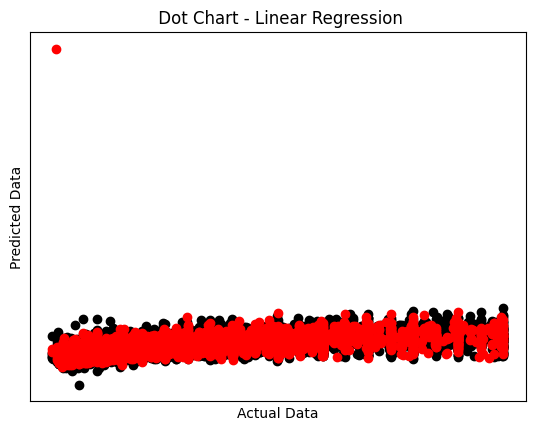

In [28]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(air_y_train, air_linear_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(air_y_validation, air_linear_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(air_y_train, air_linear_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(air_y_validation, air_linear_validation_predicted))

# Plot outputs
plt.scatter(air_y_train, air_linear_train_predicted, color="black")
plt.scatter(air_y_validation, air_linear_validation_predicted, color="red")

#plt.plot(cars_y_validation, cars_linear_validation_predicted, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart - Linear Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

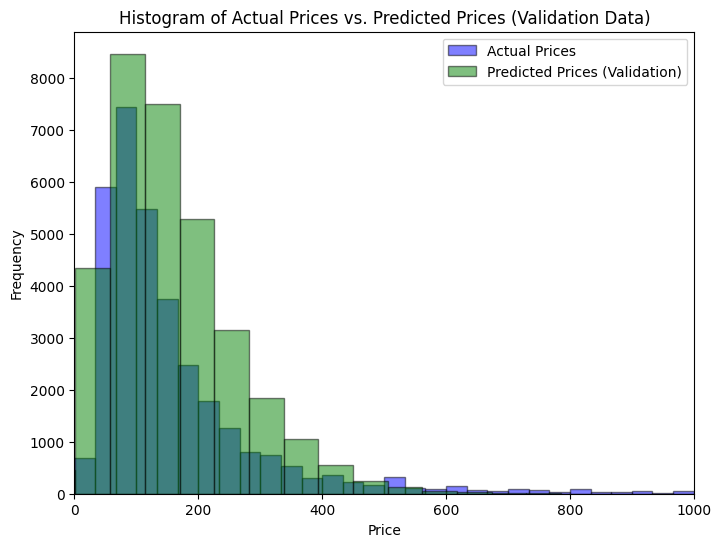

In [46]:
import matplotlib.pyplot as plt

# Assuming 'air_y_validation' is the array of actual prices for validation data
# 'air_linear_validation_predicted' is the array of predicted prices for validation data
# Replace these with your actual variable names

# Plotting the histogram with borders
plt.figure(figsize=(8, 6))
plt.hist(air_y_validation, bins=30, alpha=0.5, color='blue', label='Actual Prices', edgecolor='black')
plt.hist(air_linear_validation_predicted, bins=100, alpha=0.5, color='green', label='Predicted Prices (Validation)', edgecolor='black')
plt.title('Histogram of Actual Prices vs. Predicted Prices (Validation Data)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

# Set the range for the X-axis (replace min_value and max_value with your desired range)
min_value = 0
max_value = 1000
plt.xlim(min_value, max_value)

plt.show()

Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

In [30]:
rg_rs.fit(air_X_train, air_y_train)
rg_rs.best_params_

{'alpha': 4.923882631706742}

In [31]:
air_ridge_train_predicted = rg_rs.predict(air_X_train)
air_ridge_validation_predicted = rg_rs.predict(air_X_validation)

In [32]:
r2_score(air_y_train, air_ridge_train_predicted)

0.5665433034454337

In [33]:
r2_score(air_y_validation, air_ridge_validation_predicted)

0.5223686021299915

In [34]:
r2_train_score = r2_score(air_y_train, air_ridge_train_predicted)
r2_test_score = r2_score(air_y_validation, air_ridge_validation_predicted)
R2_train.append(round(r2_train_score,2))

Training data -Mean squared error: 8163.59
Validation data - Mean squared error: 8762.34
Training data R2 Score: 0.57
Validation data R2 Score: 0.52


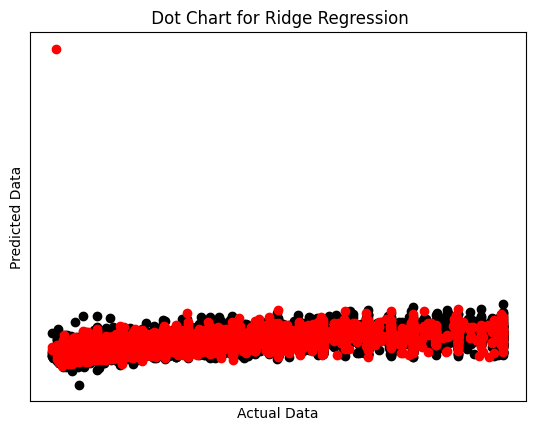

In [35]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(air_y_train, air_ridge_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(air_y_validation, air_ridge_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(air_y_train, air_ridge_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(air_y_validation, air_ridge_validation_predicted))

# Plot outputs
plt.scatter(air_y_train, air_ridge_train_predicted, color="black")
plt.scatter(air_y_validation, air_ridge_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart for Ridge Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

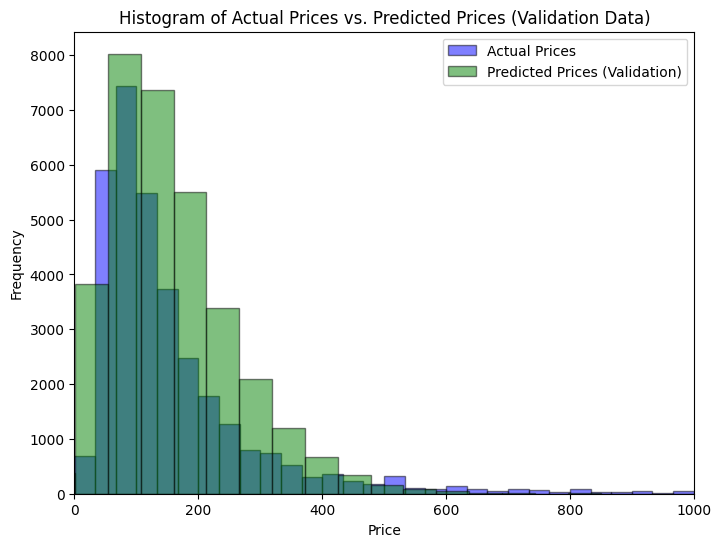

In [47]:
import matplotlib.pyplot as plt

# Assuming 'air_y_validation' is the array of actual prices for validation data
# 'air_linear_validation_predicted' is the array of predicted prices for validation data
# Replace these with your actual variable names

# Plotting the histogram with borders
plt.figure(figsize=(8, 6))
plt.hist(air_y_validation, bins=30, alpha=0.5, color='blue', label='Actual Prices', edgecolor='black')
plt.hist(air_ridge_validation_predicted, bins=100, alpha=0.5, color='green', label='Predicted Prices (Validation)', edgecolor='black')
plt.title('Histogram of Actual Prices vs. Predicted Prices (Validation Data)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

# Set the range for the X-axis (replace min_value and max_value with your desired range)
min_value = 0
max_value = 1000
plt.xlim(min_value, max_value)

plt.show()

Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators = list(range(500, 1000, 100))
# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))
# Minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 5, 7]
# Number of features to be considered at each split
max_features = ['auto', 'sqrt']

# Hyperparameters dict
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

# Initialize RandomizedSearchCV with increased n_jobs for parallel processing
rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_jobs=-1,  # Use all available cores
    verbose=2,
    n_iter=50  # Adjust the number of iterations based on computational resources
)


In [55]:
rf_rs

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]},
                   verbose=2)

In [56]:
rf_rs.fit(air_X_train, air_y_train)
rf_rs.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: ignored

Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

In [37]:
ls_rs.fit(air_X_train,air_y_train)
ls_rs.best_params_

KeyboardInterrupt: 

In [59]:
air_lasso_train_predicted = ls_rs.predict(air_X_train)
air_lasso_validation_predicted = ls_rs.predict(air_X_validation)

In [60]:
r2_score(air_y_train,air_lasso_train_predicted)

0.5674079860633495

In [61]:
r2_score(air_y_validation, air_lasso_validation_predicted)

0.5196394874633814

In [62]:
R2_train = []
R2_valid = []

In [63]:
r2_train_score = r2_score(air_y_train, air_lasso_train_predicted)
r2_test_score = r2_score(air_y_validation, air_lasso_validation_predicted)
R2_train.append(round(r2_train_score,2))

Training data -Mean squared error: 8147.30
Validation data - Mean squared error: 8812.41
Training data R2 Score: 0.57
Validation data R2 Score: 0.52


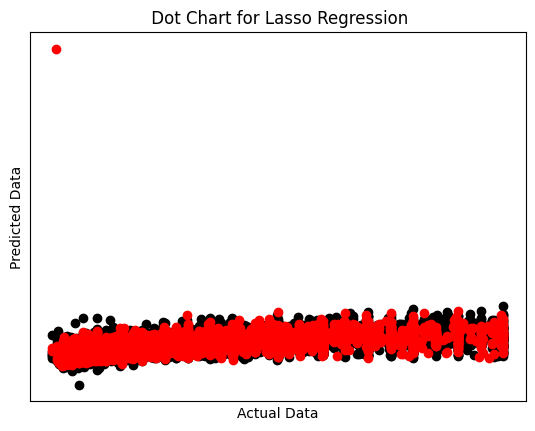

In [64]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(air_y_train, air_lasso_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(air_y_validation, air_lasso_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(air_y_train, air_lasso_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(air_y_validation, air_lasso_validation_predicted))

# Plot outputs
plt.scatter(air_y_train, air_lasso_train_predicted, color="black")
plt.scatter(air_y_validation, air_lasso_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart for Lasso Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

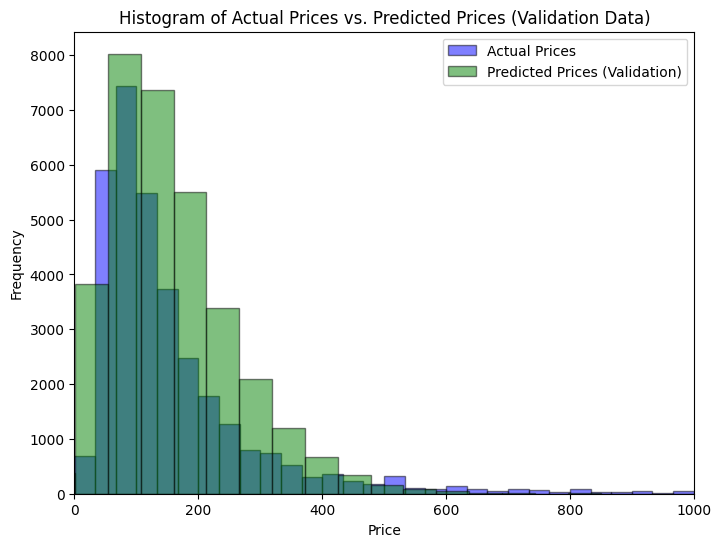

In [48]:
import matplotlib.pyplot as plt

# Assuming 'air_y_validation' is the array of actual prices for validation data
# 'air_linear_validation_predicted' is the array of predicted prices for validation data
# Replace these with your actual variable names

# Plotting the histogram with borders
plt.figure(figsize=(8, 6))
plt.hist(air_y_validation, bins=30, alpha=0.5, color='Blue', label='Actual Prices', edgecolor='black')
plt.hist(air_ridge_validation_predicted, bins=100, alpha=0.5, color='green', label='Predicted Prices (Validation)', edgecolor='black')
plt.title('Histogram of Actual Prices vs. Predicted Prices (Validation Data)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

# Set the range for the X-axis (replace min_value and max_value with your desired range)
min_value = 0
max_value = 1000
plt.xlim(min_value, max_value)

plt.show()

In [38]:
air_X_train_predicted = rg_rs.predict(air_X_train)

In [39]:
air_X_train_predicted

array([ 19.22937705, 334.62916366,  57.32915614, ..., 153.42221496,
       333.69876494, 234.71458152])

In [40]:
air_X_train.shape

(99436, 1129)

In [41]:
predictions_df = pd.DataFrame({'Predicted_Price': air_X_train_predicted})
predictions_df.to_csv('predicted_prices.csv', index=False)

In [42]:
import pandas as pd

# Assuming air_X_train_predicted contains the predicted prices
# Replace 'Predicted_Price' with the actual column name if it's different
predictions_df = pd.DataFrame({'Predicted_Price': air_X_train_predicted})

# Concatenate the original dataset and the predicted prices DataFrame horizontally
# Make sure the indices align correctly
result_df = pd.concat([Air, predictions_df], axis=1)

# Now, result_df contains your original dataset along with the predicted prices
# You can save it to a new CSV file or use it for further analysis
result_df.to_csv('dataset_with_predictions.csv', index=False)

In [43]:
print(result_df)

       Host Response Time  Host Response Rate  Host Acceptance Rate  \
0                  1 Hour                 100                  88.0   
1                  1 Hour                 100                  88.0   
2                  1 Hour                 100                  88.0   
3                  1 Hour                 100                  88.0   
4                  1 Hour                 100                  88.0   
...                   ...                 ...                   ...   
132577             1 Hour                 100                  88.0   
132578             1 Hour                 100                  88.0   
132579             1 Hour                 100                  88.0   
132580             1 Hour                 100                  88.0   
132581             1 Hour                 100                  88.0   

        Host Total Listings Count State Zipcode   Latitude  Longitude  \
0                               1    TX   78704  30.258816 -97.757398   
1

In [44]:
# Assuming your DataFrame is named 'df'
result_df.to_excel('Price_dataset.xlsx', index=False)

In [45]:
# Provide the file path
file_path = 'Price_dataset.xlsx'

# Generate a download link
files.download(file_path)

NameError: name 'files' is not defined